# gdp per capita and hk recycling volume per capita

Model Summary:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6537      0.060     10.981      0.000       0.529       0.779
HK GDP per capita -1.088e-06   1.92e-07     -5.681      0.000   -1.49e-06   -6.86e-07

R-squared: 0.6420


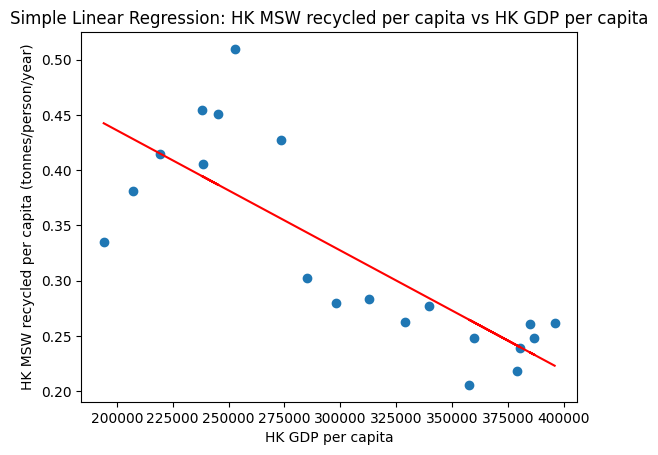

In [2]:
# !pip install pandas numpy matplotlib scikit-learn statsmodels openpyxl
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.api as sm

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("../General Stats_G@C_clean.xlsx")

### Simple Linear Regression: HK MSW recycled per capita vs HK GDP per capita

# Prepare data
df['HK GDP per capita'] = pd.to_numeric(df['HK GDP per capita'], errors='coerce')
df['HK total MSW recycled (tonnes)'] = pd.to_numeric(
    df['HK total MSW recycled (tonnes)'], errors='coerce'
)
df['HK total population (mid-year)'] = pd.to_numeric(
    df['HK total population (mid-year)'], errors='coerce'
)

# Calculate yearly MSW recycled per capita (tonnes per person per year)
df['HK MSW recycled per capita (tonnes/person/year)'] = (
    df['HK total MSW recycled (tonnes)'] / df['HK total population (mid-year)']
)

# Fit model
# Prepare data
mask = (
    df['HK GDP per capita'].notna()
    & df['HK MSW recycled per capita (tonnes/person/year)'].notna()
)
X2 = df.loc[mask, ['HK GDP per capita']]
y = df.loc[mask, 'HK MSW recycled per capita (tonnes/person/year)']

# Fit model using sklearn for predictions
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)

# Fit model using statsmodels for statistical tests
X2_sm = sm.add_constant(X2)  # Add constant term for intercept
model = sm.OLS(y, X2_sm)
results = model.fit()

# Predictions for plotting
y_pred2 = lin_reg2.predict(X2)

print("Model Summary:")
print(results.summary().tables[1])  # Print coefficient statistics
print(f"\nR-squared: {results.rsquared:.4f}")

# Plot
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.xlabel('HK GDP per capita')
plt.ylabel('HK MSW recycled per capita (tonnes/person/year)')
plt.title('Simple Linear Regression: HK MSW recycled per capita vs HK GDP per capita')
plt.show()


**GDP per capita coefficient ($\hat \beta_1$)  ≈ −1.08 × 10^{-6} (p ≈ 0.00003 < 0.05)**  

- There is a **statistically significant negative association** between HK GDP per capita and the **amount of MSW recycled per capita per year**. As GDP per capita increases, the quantity of waste recycled per person per year **tends to decrease slightly**, suggesting that periods of higher income are associated with lower per-capita recycling volume.  

- The **R-squared is moderate (~0.63)**, meaning GDP per capita explains **around 63% of the variation** in annual per-capita recycling volume; the remaining variation is likely driven by other factors such as recycling policies, market demand for recyclables, public awareness campaigns, and broader changes in consumption and waste-reduction behaviour.
